In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ImageProcessor:
    def __init__(self):
        pass

    def create_image(self):
        image = np.zeros((150, 150), dtype=np.uint8)
        image[20:70, 20:70] = 1
        image[80:140, 80:140] = 2
        return image

    def add_noise(self, image):
        noise = np.random.normal(0, 0.1, image.shape)
        noisy_image = image.astype(np.float32) + noise
        noisy_image = np.clip(noisy_image, 0, 2).astype(np.uint8)
        return noisy_image

    def apply_otsus_algorithm(self, image):
        _, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return thresholded_image

img_processor = ImageProcessor()

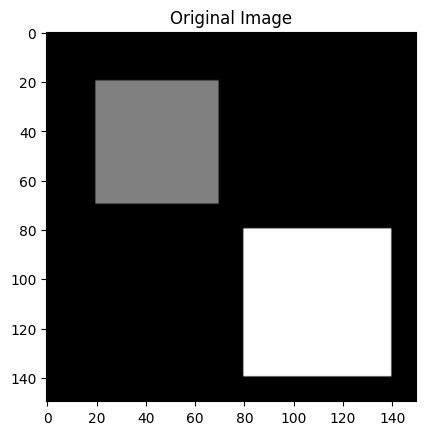

In [12]:
# Create the original image and display
original_image = img_processor.create_image()
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.show()

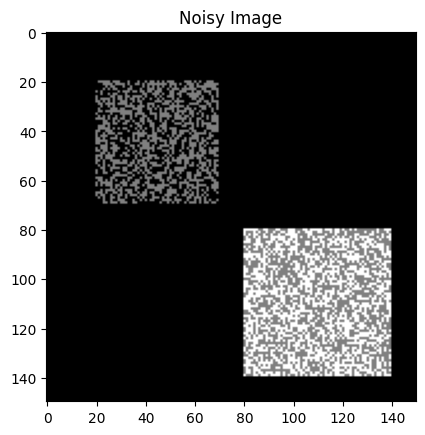

In [9]:
# Add noise to the original image and display
noisy_image = img_processor.add_noise(original_image)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.show()

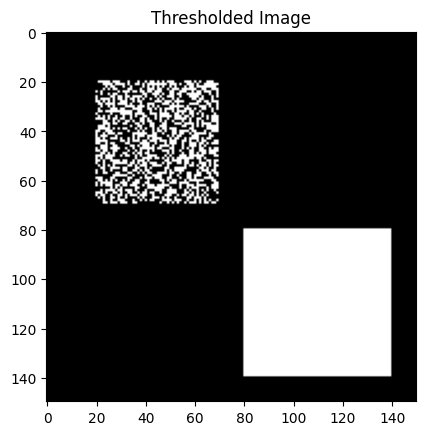

In [11]:
# Apply Otsu's thresholding algorithm to the noisy image and display
thresholded_image = img_processor.apply_otsus_algorithm(noisy_image)
plt.imshow(thresholded_image, cmap='gray')
plt.title("Thresholded Image")
plt.show()

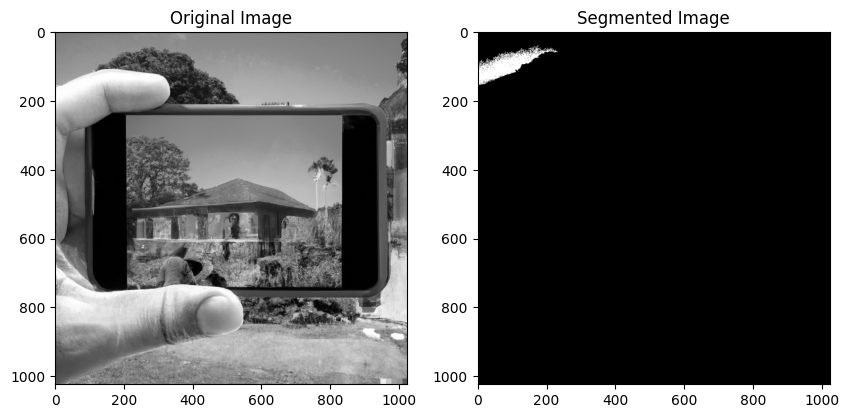

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('/content/image.png', 0)  # Add 0 to load in grayscale

def region_growing(image, seed):
    seed_point = seed
    threshold = 10
    output = np.zeros_like(image)
    queue = [seed_point]

    # Directions for 8-connectivity
    directions = [(-1, -1), (-1, 0), (-1, 1),
                  (0, -1),          (0, 1),
                  (1, -1), (1, 0), (1, 1)]

    while queue:
        current_point = queue.pop(0)
        x, y = current_point

        # Check if already segmented
        if output[x, y] != 0:
            continue

        # Check if within threshold to add to region
        if abs(int(image[x, y]) - int(image[seed_point[0], seed_point[1]])) < threshold:
            output[x, y] = 255  # Assign to region

            # Add neighbors
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < image.shape[0] and 0 <= ny < image.shape[1]:
                    queue.append((nx, ny))

    return output

seed = (100, 100)  # Set a seed point

segmented = region_growing(img, seed)

# Display the results
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Image')
plt.show()
